In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from itertools import combinations



In [4]:
df = pd.read_csv('Data_for_measuring peaks\F0004CH3.CSV', header=None, usecols=[3,4])
dfp = pd.read_csv('Data_for_measuring peaks\F0004CH4.CSV', header=None, usecols=[3,4])

print(len(df[3]))

2500


In [5]:
time = df[3][500:1800]
inten = df[4][500:1800]

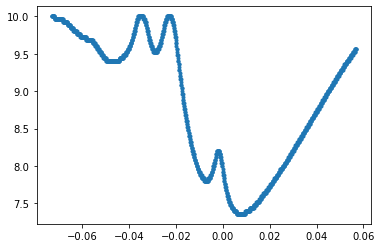

In [6]:
plt.plot(time, inten, ".")

[379 500 710]
500    -0.0730
501    -0.0729
502    -0.0728
503    -0.0727
504    -0.0726
         ...  
1795    0.0565
1796    0.0566
1797    0.0567
1798    0.0568
1799    0.0569
Name: 3, Length: 1300, dtype: float64


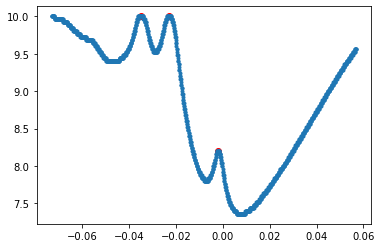

In [7]:
indices, info =find_peaks(inten, prominence=-1)
print(indices)
print(time)
plt.plot(time, inten, ".")
plt.scatter(time[indices+500], inten[indices+500], color="red")

In [8]:
peak1, peak2, peak3=time[indices+500]
peaks_list = [peak1, peak2, peak3]

peak_diff=[abs(peaks_list[0]-peaks_list[1]), abs(peaks_list[1]-peaks_list[2]), abs(peaks_list[0]-peaks_list[2])]

ratio_peaks = [peak_diff[0]/peak_diff[1],peak_diff[1]/peak_diff[2],peak_diff[0]/peak_diff[2]]
print(peaks_list)
print(peak_diff)
print(ratio_peaks)


[-0.0351, -0.023, -0.002]
[0.0121, 0.020999999999999998, 0.0331]
[0.5761904761904763, 0.634441087613293, 0.36555891238670696]


In [9]:
other_peaks = [193.741, -72.911, -229.852, (193.741+ -72.911)/2,(-72.911+ -229.852)/2,(193.741+ -229.952)/2]
other_peaks


[193.741,
 -72.911,
 -229.852,
 60.415000000000006,
 -151.38150000000002,
 -18.105499999999992]

In [10]:
other_peaks.sort()
other_peaks

[-229.852,
 -151.38150000000002,
 -72.911,
 -18.105499999999992,
 60.415000000000006,
 193.741]

In [11]:
combination = list(combinations(other_peaks, 3))
accuracy = []
for alist in combination:
    sum_list=[]
    ratio_counter=0
    diff_list=[abs(alist[0]-alist[1]), abs(alist[1]-alist[2]), abs(alist[0]-alist[2])]
    ratio_list=[diff_list[0]/diff_list[1], diff_list[1]/diff_list[2], diff_list[0]/diff_list[2]]
    for ratio in ratio_list:
        ratio_of_ratio=ratio/ratio_peaks[ratio_counter]
        sum_list.append(ratio_of_ratio)
        ratio_counter+=1
    accuracy.append(sum_list)

accuracy

[[1.735537190082644, 0.7880952380952384, 1.3677685950413219],
 [1.0218529298176724, 0.9920747776457316, 1.013754518135507],
 [0.6430156828577437, 1.1500846675318803, 0.739522477837233],
 [0.39460907670285217, 1.2842015746696658, 0.5067575976807457],
 [4.96988335383785, 0.40795907910098705, 2.027509036271014],
 [2.0429394277842303, 0.7239788588732838, 1.4790449556744665],
 [1.0214697138921152, 0.9922126731488551, 1.0135151953614916],
 [4.680229056358972, 0.4263773156635591, 1.9955435017409309],
 [1.7347179472865246, 0.7882812882042094, 1.3674456981579837],
 [3.7784766178668745, 0.49610633657442754, 1.874526192722068],
 [2.484941676918925, 0.6481580115163807, 1.6106348560459511],
 [1.0214697138921152, 0.992212673148855, 1.0135151953614916],
 [0.5107348569460576, 1.217812060520954, 0.621979068517353],
 [2.945797015371203, 0.5843499032595642, 1.7213762009544753],
 [1.091854028957073, 0.9675127982507244, 1.0563827468375853],
 [2.7570069039747596, 0.608906030260477, 1.678758129299999],
 [1.2

In [12]:
counter = 0
possibilities = []
for f in accuracy:
    if 0.99<f[0]<1.05 and 0.99<f[1]<1.05 and 0.99<f[2]<1.05:
        possibilities.append(combination[counter])
    counter+=1

possibilities

[(-229.852, -151.38150000000002, -18.105499999999992),
 (-229.852, -72.911, 193.741),
 (-151.38150000000002, -72.911, 60.415000000000006),
 (-18.105499999999992, 60.415000000000006, 193.741)]

Looking at the last list we see that, from left to right, our peaks line up with CO13, CO23 and F3.

However, there are also other peaks that it lines up with, so we should use other arguments to determine the peaks.